In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt
import  pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv('train (1).csv')
datos

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.25,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.54,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.91,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.15,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.41,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Chalet individual,1946,1950,1,NaN,0,Residencial unifamiliar,62.18,437.76,...,1,0,Interior,62801,0,1,0,7,2.0,236865
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,NaN,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,NaN,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360
998,999,Chalet individual,1922,1950,1,Nuevo,0,Residencial tipo 2,73.15,909.15,...,1,0,Interior,60406,0,0,0,4,1.5,177259


voy a hacer un peque;o analisis inicial de los datos 

In [3]:
datos.isna().sum()

Id                      0
Tipo                    0
FechaConstruccion       0
FechaReforma            0
Plantas                 0
Plan                  233
PAU                     0
CatParcela              0
PerimParcela          173
Superficie              0
Aseos                   0
Habitaciones            0
Garaje                  0
Piscina                 0
Vallada                 0
CallePavimentada        0
Callejon                0
Formato                 0
TipoDesnivel            0
Desnivel                0
GasNatural              0
AguaCorriente           0
FosaSeptica             0
Situacion               0
CP                      0
ProxCarretera           0
ProxCallePrincipal      0
ProxViasTren            0
Estado                  0
RatingEstrellas         0
Precio                  0
dtype: int64

vemos que nos faltan datos de plan y de perimetro de la parcela, vamos a ver que tipos de plan tenemos

In [4]:
datos['Plan'].unique()

array(['Antiguo', 'Nuevo', nan], dtype=object)

vemos que puede ser solo antiguo o nuevo

El perimetro de parcela puede venir dado por el area o superficie, vamos a intentar encontrar un multiplo medio para imputar los valores


In [5]:
datos['multiplo_medio'] = datos['Superficie'] / datos['PerimParcela']
multiplo_medio = datos['multiplo_medio'].mean()
multiplo_medio

11.041549379174883

In [6]:
valores_faltantes = datos['PerimParcela'].isna()
datos.loc[valores_faltantes, 'PerimParcela'] = datos.loc[valores_faltantes, 'Superficie'] / multiplo_medio

In [7]:
datos.drop(['multiplo_medio'], axis=1, inplace= True)

In [8]:
datos.isna().sum()

Id                      0
Tipo                    0
FechaConstruccion       0
FechaReforma            0
Plantas                 0
Plan                  233
PAU                     0
CatParcela              0
PerimParcela            0
Superficie              0
Aseos                   0
Habitaciones            0
Garaje                  0
Piscina                 0
Vallada                 0
CallePavimentada        0
Callejon                0
Formato                 0
TipoDesnivel            0
Desnivel                0
GasNatural              0
AguaCorriente           0
FosaSeptica             0
Situacion               0
CP                      0
ProxCarretera           0
ProxCallePrincipal      0
ProxViasTren            0
Estado                  0
RatingEstrellas         0
Precio                  0
dtype: int64

el siguiente paso es intentar sacar algun parametro del que depende el plan urbanistico

In [9]:
datos['CP'].unique()

array([60061, 50018, 62451, 60706, 62040, 50011, 50012, 61704, 62801,
       50010, 60645, 50014, 50015, 60406, 60936, 61528, 50017, 60118,
       62447, 60646, 61705, 61615, 61874], dtype=int64)

In [10]:
datos[datos['Plan'] == 'Nuevo']

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.150000,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
29,30,Chalet individual,1927,1950,1,Nuevo,0,Residencial tipo 2,73.150000,587.52,...,1,0,Interior,62801,0,1,1,6,2.0,123365
30,31,Chalet individual,1920,1950,2,Nuevo,0,Terciario,60.960000,789.68,...,1,0,Interior,60406,0,1,0,4,2.0,72038
63,64,Chalet individual,1921,1950,2,Nuevo,0,Residencial tipo 2,60.960000,956.90,...,1,0,Interior,61704,0,1,0,6,3.5,233110
68,69,Chalet individual,1945,1950,1,Nuevo,0,Residencial tipo 2,57.300000,428.10,...,1,0,Esquina,61704,1,0,0,6,2.0,133206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,Chalet individual,1940,1950,2,Nuevo,0,Residencial unifamiliar,202.691662,2238.03,...,1,0,Interior,62447,0,0,0,7,3.5,406944
974,975,Chalet individual,1910,1993,2,Nuevo,0,Residencial unifamiliar,73.150000,1060.40,...,1,0,Esquina,62801,0,1,0,8,3.5,290056
976,977,Chalet individual,1923,1958,1,Nuevo,0,Residencial unifamiliar,62.180000,548.13,...,1,0,Interior,62801,0,0,0,7,2.0,166545
991,992,Chalet individual,1882,1986,2,Nuevo,0,Residencial tipo 2,147.520000,1641.69,...,1,0,Esquina,61704,1,0,0,9,4.0,290922


In [11]:
datos[datos['CP'] == 62801]

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
9,10,Chalet adosado,1939,1950,3,NaN,0,Residencial unifamiliar,60.960000,689.34,...,1,0,Esquina,62801,1,0,0,6,2.5,212511
15,16,Chalet individual,1929,2001,1,NaN,0,Residencial tipo 2,62.180000,568.57,...,1,0,Esquina,62801,0,0,0,8,3.5,247234
29,30,Chalet individual,1927,1950,1,Nuevo,0,Residencial tipo 2,73.150000,587.52,...,1,0,Interior,62801,0,1,1,6,2.0,123365
51,52,Chalet individual,1934,1950,1,NaN,0,Residencial tipo 2,63.400000,579.71,...,1,0,Interior,62801,0,0,0,6,3.0,223035
77,78,Chalet individual,1948,2001,1,NaN,0,Residencial tipo 2,60.960000,802.22,...,1,0,Interior,62801,0,0,0,5,2.5,228720
146,147,Chalet individual,1931,1993,1,Nuevo,0,Residencial tipo 2,62.180000,568.57,...,1,0,Esquina,62801,0,0,0,7,2.5,181826
149,150,Chalet individual,1936,1950,1,NaN,0,Residencial tipo 2,52.502595,579.71,...,1,0,Interior,62801,0,0,0,4,2.5,224009
184,185,Chalet individual,1908,1991,1,NaN,0,Residencial unifamiliar,112.170000,691.01,...,1,0,Interior,62801,0,1,0,8,2.5,247383
250,251,Chalet individual,1940,1966,1,Nuevo,0,Residencial unifamiliar,67.060000,497.03,...,1,0,Interior,62801,0,0,0,2,1.5,127378
275,276,Chalet individual,1925,2007,1,NaN,0,Residencial unifamiliar,67.060000,674.85,...,1,0,Interior,62801,0,0,0,7,3.5,354994


parece que se ve una pequena caracteristica y es que todos los del plan nuevo parece que tienen una fecha anterior a al menos 1946, ya que el chalet 534 que nos aparece en esa cabecera es de 1946, vamos a probar con eso

In [12]:
condicion = (datos['FechaConstruccion'] < 1946) & (datos['Plan'] == 'Nuevo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
3,4,Chalet individual,1915,1970,2,Nuevo,0,Residencial unifamiliar,73.150000,887.22,...,1,0,Esquina,62451,0,0,0,5,3.5,272706
29,30,Chalet individual,1927,1950,1,Nuevo,0,Residencial tipo 2,73.150000,587.52,...,1,0,Interior,62801,0,1,1,6,2.0,123365
30,31,Chalet individual,1920,1950,2,Nuevo,0,Terciario,60.960000,789.68,...,1,0,Interior,60406,0,1,0,4,2.0,72038
63,64,Chalet individual,1921,1950,2,Nuevo,0,Residencial tipo 2,60.960000,956.90,...,1,0,Interior,61704,0,1,0,6,3.5,233110
68,69,Chalet individual,1945,1950,1,Nuevo,0,Residencial tipo 2,57.300000,428.10,...,1,0,Esquina,61704,1,0,0,6,2.0,133206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,Chalet individual,1940,1950,2,Nuevo,0,Residencial unifamiliar,202.691662,2238.03,...,1,0,Interior,62447,0,0,0,7,3.5,406944
974,975,Chalet individual,1910,1993,2,Nuevo,0,Residencial unifamiliar,73.150000,1060.40,...,1,0,Esquina,62801,0,1,0,8,3.5,290056
976,977,Chalet individual,1923,1958,1,Nuevo,0,Residencial unifamiliar,62.180000,548.13,...,1,0,Interior,62801,0,0,0,7,2.0,166545
991,992,Chalet individual,1882,1986,2,Nuevo,0,Residencial tipo 2,147.520000,1641.69,...,1,0,Esquina,61704,1,0,0,9,4.0,290922


In [13]:
condicion = (datos['FechaConstruccion'] >= 1946) & (datos['Plan'] == 'Antiguo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.250000,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.540000,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.910000,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.410000,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
6,7,Chalet individual,2004,2005,1,Antiguo,0,Residencial unifamiliar,91.440000,936.83,...,1,0,Interior,50011,0,0,0,5,4.0,575005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Chalet individual,2005,2006,2,Antiguo,0,Residencial unifamiliar,82.910000,821.82,...,1,0,Interior,60061,0,0,0,5,3.0,338740
994,995,Chalet individual,2006,2007,1,Antiguo,0,Residencial unifamiliar,117.040000,1157.20,...,1,0,Frontal 2 lados,60645,0,0,0,5,5.0,584441
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,89.683972,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,98.585802,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360


In [14]:
condicion = (datos['Plan'] == 'Antiguo')
resultado = datos[condicion]
resultado

,Id,Tipo,FechaConstruccion,FechaReforma,Plantas,Plan,PAU,CatParcela,PerimParcela,Superficie,...,AguaCorriente,FosaSeptica,Situacion,CP,ProxCarretera,ProxCallePrincipal,ProxViasTren,Estado,RatingEstrellas,Precio
0,1,Chalet individual,2003,2003,2,Antiguo,0,Residencial unifamiliar,79.250000,785.03,...,1,0,Interior,60061,0,0,0,5,3.5,375497
1,2,Chalet individual,1976,1976,1,Antiguo,0,Residencial unifamiliar,97.540000,891.87,...,1,0,Frontal 2 lados,50018,0,1,0,8,3.0,339946
2,3,Chalet individual,2001,2002,2,Antiguo,0,Residencial unifamiliar,82.910000,1045.16,...,1,0,Interior,60061,0,0,0,5,3.5,402511
4,5,Chalet individual,2000,2000,2,Antiguo,0,Residencial unifamiliar,102.410000,1324.80,...,1,0,Frontal 2 lados,60706,0,0,0,5,4.0,450236
6,7,Chalet individual,2004,2005,1,Antiguo,0,Residencial unifamiliar,91.440000,936.83,...,1,0,Interior,50011,0,0,0,5,4.0,575005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Chalet individual,2005,2006,2,Antiguo,0,Residencial unifamiliar,82.910000,821.82,...,1,0,Interior,60061,0,0,0,5,3.0,338740
994,995,Chalet individual,2006,2007,1,Antiguo,0,Residencial unifamiliar,117.040000,1157.20,...,1,0,Frontal 2 lados,60645,0,0,0,5,5.0,584441
996,997,Chalet individual,1961,1961,1,Antiguo,0,Residencial unifamiliar,89.683972,990.25,...,1,0,Interior,50014,0,0,0,6,2.5,265888
997,998,Chalet individual,1970,1970,1,Antiguo,0,Residencial unifamiliar,98.585802,1088.54,...,1,0,Interior,50012,0,0,0,6,3.0,320360


hemos comprobado que si la fecha de construccion es menor que 1946 el Plan es Nuevo

In [15]:
def llenar_plan(row):
    if pd.isna(row['Plan']):
        if row['FechaConstruccion'] < 1946:
            return 'Nuevo'
        else:
            return 'Antiguo'
    else:
        return row['Plan']

# Aplica la función a cada fila del DataFrame
datos['Plan'] = datos.apply(llenar_plan, axis=1)

In [16]:
datos.isna().sum()

Id                    0
Tipo                  0
FechaConstruccion     0
FechaReforma          0
Plantas               0
Plan                  0
PAU                   0
CatParcela            0
PerimParcela          0
Superficie            0
Aseos                 0
Habitaciones          0
Garaje                0
Piscina               0
Vallada               0
CallePavimentada      0
Callejon              0
Formato               0
TipoDesnivel          0
Desnivel              0
GasNatural            0
AguaCorriente         0
FosaSeptica           0
Situacion             0
CP                    0
ProxCarretera         0
ProxCallePrincipal    0
ProxViasTren          0
Estado                0
RatingEstrellas       0
Precio                0
dtype: int64

ya tenemos todos los valorews completos ahora vamos a hacer x e y y unos dummies de los valores no int, Tipo, Plan, CatParcela...

In [17]:
y = datos['Precio']
x = datos.drop(['Precio'], axis=1)

In [18]:
datos.dtypes

Id                      int64
Tipo                   object
FechaConstruccion       int64
FechaReforma            int64
Plantas                 int64
Plan                   object
PAU                     int64
CatParcela             object
PerimParcela          float64
Superficie            float64
Aseos                   int64
Habitaciones            int64
Garaje                  int64
Piscina                 int64
Vallada                 int64
CallePavimentada        int64
Callejon                int64
Formato                object
TipoDesnivel           object
Desnivel               object
GasNatural              int64
AguaCorriente           int64
FosaSeptica             int64
Situacion              object
CP                      int64
ProxCarretera           int64
ProxCallePrincipal      int64
ProxViasTren            int64
Estado                  int64
RatingEstrellas       float64
Precio                  int64
dtype: object

In [19]:
columnas_no_numericas = datos.select_dtypes(exclude=[int, float]).columns

df = pd.get_dummies(datos, columns=columnas_no_numericas)
df.head()

,Id,FechaConstruccion,FechaReforma,Plantas,PAU,PerimParcela,Superficie,Aseos,Habitaciones,Garaje,...,TipoDesnivel_Llana,TipoDesnivel_Muy irregular,Desnivel_Elevado,Desnivel_Ligero,Desnivel_Moderado,Situacion_Esquina,Situacion_Frontal 2 lados,Situacion_Frontal 3 lados,Situacion_Interior,Situacion_Trasero
0,1,2003,2003,2,0,79.25,785.03,4,8,1,...,True,False,False,True,False,False,False,False,True,False
1,2,1976,1976,1,0,97.54,891.87,3,6,1,...,True,False,False,True,False,False,True,False,False,False
2,3,2001,2002,2,0,82.91,1045.16,4,6,1,...,True,False,False,True,False,False,False,False,True,False
3,4,1915,1970,2,0,73.15,887.22,2,7,1,...,True,False,False,True,False,True,False,False,False,False
4,5,2000,2000,2,0,102.41,1324.80,4,9,1,...,True,False,False,True,False,False,True,False,False,False


In [20]:
df = df.astype(int)

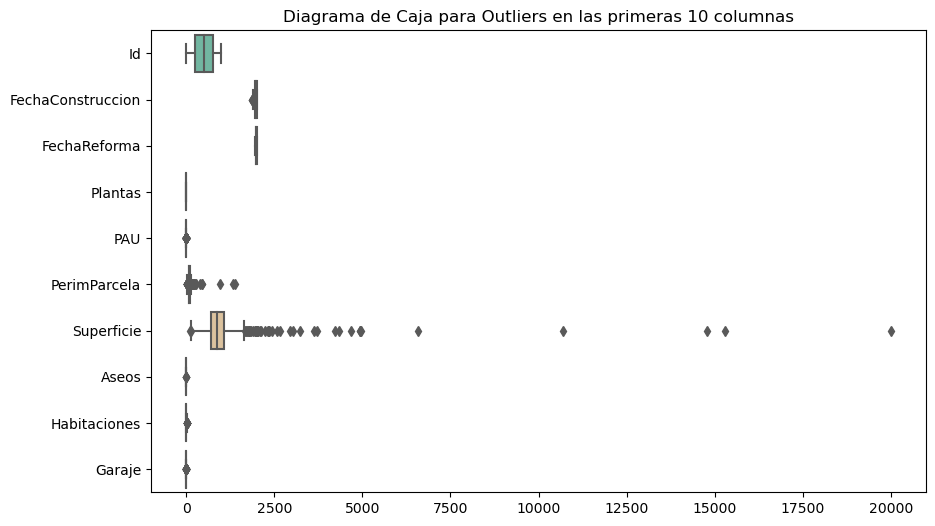

Columnas con outliers:
FechaConstruccion
PAU
PerimParcela
Superficie
Aseos
Habitaciones
Garaje


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las primeras 10 columnas de tu DataFrame df
df_subset = df.iloc[:, :10]

# Calcular estadísticas descriptivas
desc_stats = df_subset.describe()

# Crear un boxplot para cada columna con posibles outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_subset, orient="h", palette="Set2")
plt.title("Diagrama de Caja para Outliers en las primeras 10 columnas")
plt.show()

# Identificar las columnas con outliers
outlier_columns = []
for column in df_subset.columns:
    Q1 = desc_stats[column]['25%']
    Q3 = desc_stats[column]['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_subset[(df_subset[column] < lower_bound) | (df_subset[column] > upper_bound)]
    if not outliers.empty:
        outlier_columns.append(column)

# Imprimir las columnas con outliers
if outlier_columns:
    print("Columnas con outliers:")
    for column in outlier_columns:
        print(column)
else:
    print("No se encontraron outliers en las primeras 10 columnas de df.")

In [22]:
df = df[df['Superficie'] <= 4000]

In [23]:
y = df['Precio']
x = df.drop(['Precio'], axis=1)

ahora ya tenemos nuestro df completo, vamos a hacer un zscaler que es mas robusto ante los outliers

In [25]:
x

,Id,FechaConstruccion,FechaReforma,Plantas,PAU,PerimParcela,Superficie,Aseos,Habitaciones,Garaje,...,TipoDesnivel_Llana,TipoDesnivel_Muy irregular,Desnivel_Elevado,Desnivel_Ligero,Desnivel_Moderado,Situacion_Esquina,Situacion_Frontal 2 lados,Situacion_Frontal 3 lados,Situacion_Interior,Situacion_Trasero
0,1,2003,2003,2,0,79,785,4,8,1,...,1,0,0,1,0,0,0,0,1,0
1,2,1976,1976,1,0,97,891,3,6,1,...,1,0,0,1,0,0,1,0,0,0
2,3,2001,2002,2,0,82,1045,4,6,1,...,1,0,0,1,0,0,0,0,1,0
3,4,1915,1970,2,0,73,887,2,7,1,...,1,0,0,1,0,1,0,0,0,0
4,5,2000,2000,2,0,102,1324,4,9,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1946,1950,1,0,62,437,3,5,1,...,1,0,0,0,1,0,0,0,1,0
996,997,1961,1961,1,0,89,990,2,6,1,...,1,0,0,1,0,0,0,0,1,0
997,998,1970,1970,1,0,98,1088,2,6,1,...,1,0,0,1,0,0,0,0,1,0
998,999,1922,1950,1,0,73,909,1,6,1,...,1,0,0,1,0,0,0,0,1,0


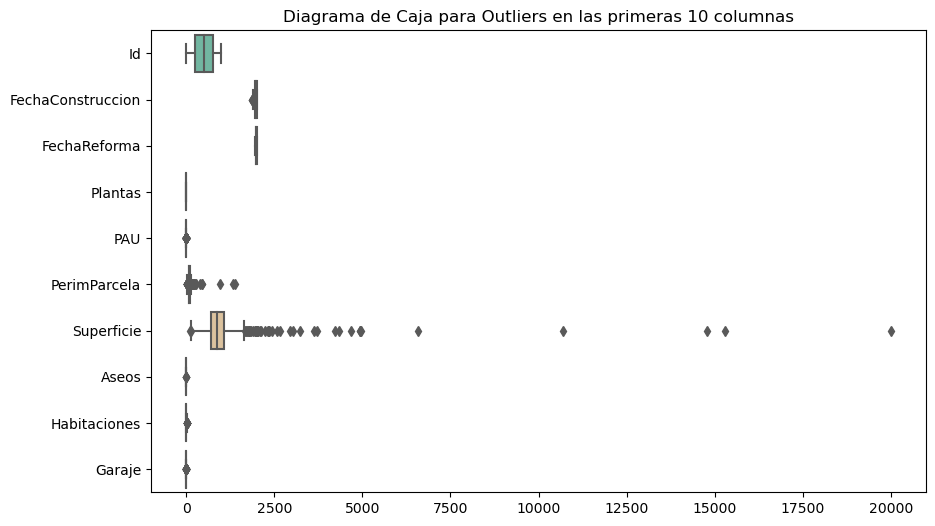

Columnas con outliers:
FechaConstruccion
PAU
PerimParcela
Superficie
Aseos
Habitaciones
Garaje


vale ahora vamos a probar algunos modelos y una cross validation de 10 folds

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import KFold, train_test_split

def regresion_con_validacion_cruzada_y_test(X, y):
  
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= False)
    
    # Inicializa los modelos
    modelos = {
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=1.0),
        "Random Forest": RandomForestRegressor(n_estimators=800,min_samples_leaf= 4, min_samples_split= 5, max_depth= None,  random_state=42),
        "Elastic Net": ElasticNet(random_state=42),
        "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
        "TheilSen": TheilSenRegressor(random_state=0),
        "HURBER": HuberRegressor(alpha= 0.0006, epsilon= 2.5, max_iter= 50),
        "SVR": SVR(C= 300, epsilon= 0.3,kernel= 'linear'),
        "GBR": GradientBoostingRegressor(learning_rate= 0.01, max_depth= 5, min_samples_leaf= 8, min_samples_split= 10, n_estimators =500)
    }
    
 
    resultados = {}
    for nombre, modelo in modelos.items():
        mse_scores = []
        r2_scores = []
        mae_scores = []
        mape_scores = []
        
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(X_train):
            
            train_index = train_index.astype('int64')
            X_train_fold = X_train.iloc[train_index]
            X_val_fold = X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            modelo.fit(X_train_fold, y_train_fold)
            y_pred = modelo.predict(X_val_fold)
            
            mse_fold = mean_squared_error(y_val_fold, y_pred)
            r2_fold = r2_score(y_val_fold, y_pred)
            mae_fold = mean_absolute_error(y_val_fold, y_pred)
            mape_fold = (mean_absolute_percentage_error(y_val_fold, y_pred)*100)
            
            mse_scores.append(mse_fold)
            r2_scores.append(r2_fold)
            mae_scores.append(mae_fold)
            mape_scores.append(mape_fold)
        

        mse_promedio = np.mean(mse_scores)
        r2_promedio = np.mean(r2_scores)
        mae_promedio = np.mean(mae_scores)
        mape_promedio = np.mean(mape_scores)
        
        # Evalúa el modelo en el conjunto de prueba
        modelo.fit(X_train, y_train)
        y_pred_test = modelo.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        mae_test =  mean_absolute_error(y_test, y_pred_test)
        mape_test =  (mean_absolute_percentage_error(y_test, y_pred_test)*100)
        
        resultados[nombre] = {
            'MSE Promedio': mse_promedio,
            'R² Promedio': r2_promedio,
            'MAE Promedio': mae_promedio,
            'MAPE Promedio': mape_promedio,
            'MSE en Test': mse_test,
            'R² en Test': r2_test,
            'MAE en Test': mae_test,
            'MAPE en Test': mape_test
            
        }
    
    return resultados


resultados = regresion_con_validacion_cruzada_y_test(x, y)


for modelo, metricas in resultados.items():
    print(f"Modelo: {modelo}")
    print(f"MSE Promedio en Validación Cruzada: {metricas['MSE Promedio']}")
    print(f"R² Promedio en Validación Cruzada: {metricas['R² Promedio']}")
    print(f"MAE Promedio en Validación Cruzada: {metricas['MAE Promedio']}")
    print(f"MAPE Promedio en Validación Cruzada: {metricas['MAPE Promedio']}")    
    print(f"MSE en Test: {metricas['MSE en Test']}")
    print(f"R² en Test: {metricas['R² en Test']}")
    print(f"MAE en Test: {metricas['MAE en Test']}")
    print(f"MAPE en Test: {metricas['MAPE en Test']}")
    print()

c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.273e+10, tolerance: 1.601e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+11, tolerance: 1.645e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.577e+11, toleranc

Modelo: Ridge
MSE Promedio en Validación Cruzada: 6118559772.051288
R² Promedio en Validación Cruzada: 0.7093636553375072
MAE Promedio en Validación Cruzada: 55669.33712449375
MAPE Promedio en Validación Cruzada: 18.297433376008975
MSE en Test: 4537453493.461441
R² en Test: 0.7284426547031093
MAE en Test: 48150.47625321047
MAPE en Test: 15.770126114673547

Modelo: Lasso
MSE Promedio en Validación Cruzada: 6158550460.166477
R² Promedio en Validación Cruzada: 0.7072559700504504
MAE Promedio en Validación Cruzada: 55941.699681224745
MAPE Promedio en Validación Cruzada: 18.43017669283593
MSE en Test: 4580476698.158778
R² en Test: 0.7258678035733711
MAE en Test: 48543.52794202601
MAPE en Test: 16.00769077363937

Modelo: Random Forest
MSE Promedio en Validación Cruzada: 5331988043.613756
R² Promedio en Validación Cruzada: 0.7470987103012248
MAE Promedio en Validación Cruzada: 47449.38127610254
MAPE Promedio en Validación Cruzada: 14.923349194352658
MSE en Test: 3655849044.062484
R² en Test: 

In [27]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= False)


# GridSearch para SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 20, 30, 40, 50, 80, 100, 200, 300, 400, 500, 700],
    'epsilon': [0.5, 0.1, 0.01, 0.001, 0.005, 0.0007, 0.0001, 0.00005, 0.00001]
}

svr = SVR()
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5)
grid_svr.fit(X_train, y_train)

# GridSearch para Huber Regressor
param_grid_huber = {
    'epsilon': [1.15, 1.35, 1.5, 1.75, 2,2.10, 2.15, 2.20, 2.3,2.4, 2.5, 2.6, 2.8],
    'alpha': [0.0008, 0.0006, 0.0003, 0.0002, 0.0001, 0.001, 0.01, 0.1],
    'max_iter': [40, 50, 60, 70, 80 ]
}

huber = HuberRegressor()
grid_huber = GridSearchCV(huber, param_grid_huber, cv=5)
grid_huber.fit(X_train, y_train)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza una búsqueda de cuadrícula para Random Forest.
rf = RandomForestRegressor()
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza una búsqueda de cuadrícula para Gradient Boosting Regressor.
gbr = GradientBoostingRegressor()
grid_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5)
grid_gbr.fit(X_train, y_train)
# Imprimir los mejores parámetros para SVR y Huber Regressor
print("Mejores parámetros para SVR:", grid_svr.best_params_)
print("Mejores parámetros para Huber Regressor:", grid_huber.best_params_)
print("Mejores parámetros para RF:", grid_rf.best_params_)
print("Mejores parámetros para RF:", grid_gbr.best_params_)

y_pred_svr = grid_svr.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
y_pred_huber = grid_huber.best_estimator_.predict(X_test)
y_pred_gbr = grid_gbr.best_estimator_.predict(X_test)

# Evalúa los modelos.
mse_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
mse_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mse_huber = mean_absolute_percentage_error(y_test, y_pred_huber)
mse_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)

c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Horiz\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

Mejores parámetros para SVR: {'C': 80, 'epsilon': 0.001, 'kernel': 'linear'}
Mejores parámetros para Huber Regressor: {'alpha': 0.0008, 'epsilon': 2.4, 'max_iter': 80}
Mejores parámetros para RF: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mejores parámetros para RF: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
print("Error cuadrático medio (MSE) para svr:", mse_svr)
print("Error cuadrático medio (MSE) para Random Forest:", mse_rf)
print("Error cuadrático medio (MSE) para Huber Regressor:", mse_huber)
print("Error cuadrático medio (MSE) para Gradient Boosting Regressor:", mse_gbr)

Error cuadrático medio (MSE) para svr: 0.13742486381011654
Error cuadrático medio (MSE) para Random Forest: 0.1291977719784697
Error cuadrático medio (MSE) para Huber Regressor: 0.14795578133962298
Error cuadrático medio (MSE) para Gradient Boosting Regressor: 0.12926747919008882


In [ ]:
param_grid_gbr = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 6, 8, 10]
}

# Realiza una búsqueda de cuadrícula para Gradient Boosting Regressor.
gbr = GradientBoostingRegressor()
grid_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5)
grid_gbr.fit(X_train, y_train)
# Imprimir los mejores parámetros para SVR y Huber Regressor

print("Mejores parámetros para RF:", grid_gbr.best_params_)

y_pred_gbr = grid_gbr.best_estimator_.predict(X_test)
mse_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)

print("Error cuadrático medio (MSE) para Gradient Boosting Regressor:", mse_gbr)


Mejores parámetros para RF: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 500}
Error cuadrático medio (MSE) para Gradient Boosting Regressor: 0.12488980365479294
